### MFIN7034 Problem Set 2 – Risk Analysis

In [1]:
import os

data_path = "data"
if os.path.exists(data_path):
    os.chdir(data_path)
    print("current working directory: ", os.getcwd())
else:
    print("invalid data address")

current working directory:  /Users/Mike_Home/Desktop/MFIN7034 Machine Learning and Artificial Intelligence in Finance/HKU-MFIN7034-ML/data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
credit_risk_df = pd.read_csv("credit_risk.csv")
credit_risk_df.head()

,default_label,age,gender,edu,housing,income,job_occupation,past_bad_credit,married
0,0,45,0,2,0,8756.330191,0,1,1
1,0,33,1,1,1,4762.472193,1,1,0
2,0,21,0,3,0,10944.838300,0,1,0
3,0,64,0,2,1,3957.592804,2,1,1
4,0,33,0,3,1,17820.791010,1,1,0


In [4]:
defualt_rate = len(credit_risk_df[credit_risk_df["default_label"] == 1]) / len(credit_risk_df) * 100
print(f"The default rate is {defualt_rate:.2f}%")

The default rate is 2.22%


In [5]:
credit_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14262 entries, 0 to 14261
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   default_label    14262 non-null  int64  
 1   age              14262 non-null  int64  
 2   gender           14262 non-null  int64  
 3   edu              14262 non-null  int64  
 4   housing          14262 non-null  int64  
 5   income           14255 non-null  float64
 6   job_occupation   14262 non-null  int64  
 7   past_bad_credit  14262 non-null  int64  
 8   married          14262 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1002.9 KB


In [6]:
credit_risk_df.describe()

,default_label,age,gender,edu,housing,income,job_occupation,past_bad_credit,married
count,14262.000000,14262.000000,14262.000000,14262.000000,14262.000000,1.425500e+04,14262.000000,14262.000000,14262.000000
mean,0.022157,46.566540,0.458701,1.695905,0.625789,1.233044e+04,0.336068,0.964591,0.525522
std,0.147198,221.030605,0.498309,1.101667,0.483936,2.214739e+05,0.557614,0.184817,0.499366
min,0.000000,17.000000,0.000000,0.000000,0.000000,6.504225e+02,0.000000,0.000000,0.000000
25%,0.000000,29.000000,0.000000,1.000000,0.000000,2.413715e+03,0.000000,1.000000,0.000000
50%,0.000000,42.000000,0.000000,2.000000,1.000000,5.565963e+03,0.000000,1.000000,1.000000
75%,0.000000,54.000000,1.000000,2.000000,1.000000,1.059000e+04,1.000000,1.000000,1.000000
max,1.000000,9999.000000,1.000000,4.000000,1.000000,9.999999e+06,2.000000,1.000000,1.000000


In [7]:
print(credit_risk_df.isnull().sum())
# drop na values
credit_risk_df.dropna(inplace=True)

default_label      0
age                0
gender             0
edu                0
housing            0
income             7
job_occupation     0
past_bad_credit    0
married            0
dtype: int64


#### 1.1 Logistic Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

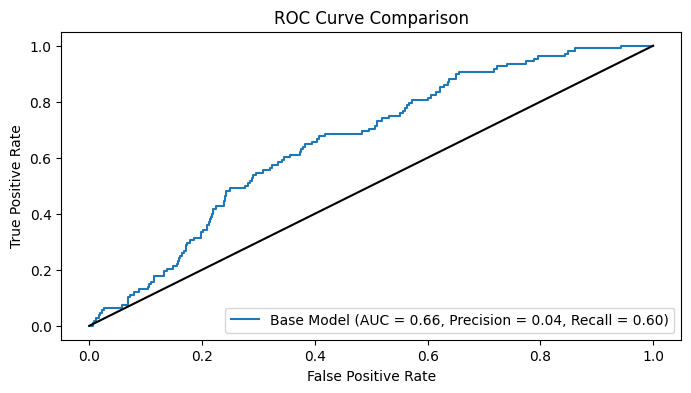

In [61]:
# define the feature columns and target column
def run_logistic_regression(features_df, target_series, model_name="", max_iter=1000, plot=True):
    X_train, X_test, y_train, y_test = train_test_split(
        features_df, target_series, test_size=0.3, random_state=42
    )
    
    # add class weight parameter to handle imbalance
    log_reg = LogisticRegression(class_weight="balanced", max_iter=max_iter)
    log_reg.fit(X_train, y_train)
    
    # get predicted probabilities for ROC curve
    y_proba = log_reg.predict_proba(X_test)[:, 1]
    
    # calculate evaluation metrics
    fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
    auc_score = metrics.roc_auc_score(y_test, y_proba)

    # get predicted labels
    y_pred = log_reg.predict(X_test)
    # calculate precision and recall
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)

    if plot:
        # run and compare models
        plt.figure(figsize=(8, 4))
        # plot ROC curve
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f})")
        plt.plot([0, 1], [0, 1], "k-")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve Comparison")
        plt.legend(loc="lower right")
        plt.show()

    return auc_score

# original features
base_features = ["age", "gender", "edu", "housing", "income", 
                "job_occupation", "past_bad_credit", "married"]

_ = run_logistic_regression(
    credit_risk_df[base_features],
    credit_risk_df["default_label"],
    model_name="Base Model"
)

In [62]:
# add more interaction term variables and non-linear transformation variables
credit_risk_transformed_df = credit_risk_df.copy()
credit_risk_transformed_df["age_squared"] = credit_risk_transformed_df["age"] ** 2
credit_risk_transformed_df["age_sqrt"] = np.sqrt(credit_risk_transformed_df["age"])
credit_risk_transformed_df["age_log"] = np.log(credit_risk_transformed_df["age"])

credit_risk_transformed_df["income_squared"] = credit_risk_transformed_df["income"] ** 2
credit_risk_transformed_df["income_sqrt"] = np.sqrt(credit_risk_transformed_df["income"])
credit_risk_transformed_df["income_log"] = np.log(credit_risk_transformed_df["income"])

credit_risk_transformed_df["housing_squared"] = credit_risk_transformed_df["housing"] ** 2
credit_risk_transformed_df["edu_squared"] = credit_risk_transformed_df["edu"] ** 2

credit_risk_transformed_df["age_income_interaction"] = credit_risk_transformed_df["age"] * credit_risk_transformed_df["income"]
credit_risk_transformed_df["edu_housing_interaction"] = credit_risk_transformed_df["edu"] * credit_risk_transformed_df["housing"]
credit_risk_transformed_df["age_edu_interaction"] = credit_risk_transformed_df["age"] * credit_risk_transformed_df["edu"]
credit_risk_transformed_df["income_housing_interaction"] = credit_risk_transformed_df["income"] * credit_risk_transformed_df["housing"]

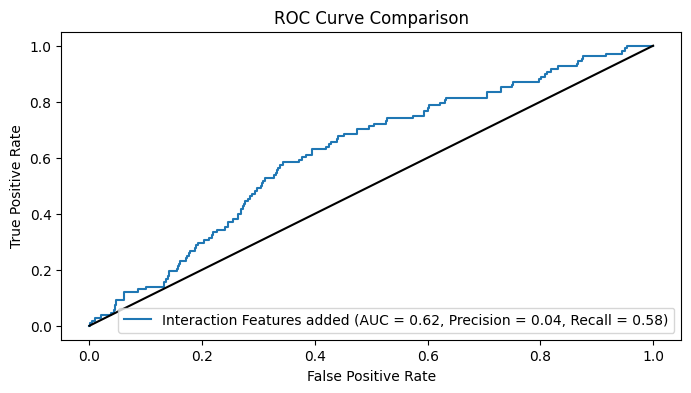

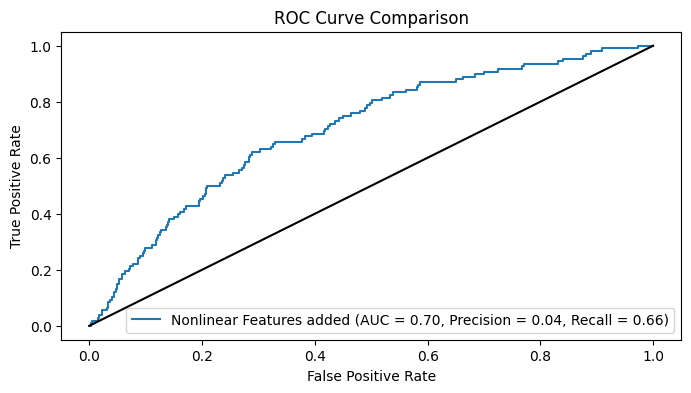

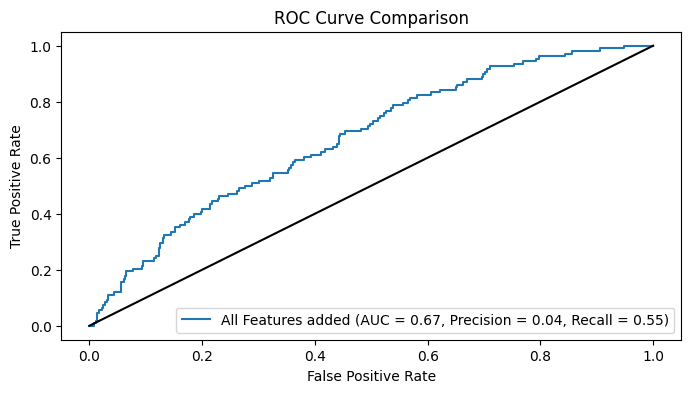

In [66]:
interaction_features = [
    "age_income_interaction",
    "edu_housing_interaction",
    "age_edu_interaction",
    "income_housing_interaction"
]

nonlinear_features = [
    "age_sqrt",
    "income_sqrt",
    "housing_squared",
    "edu_squared"
]

for features, name in [
    (base_features + interaction_features, "Interaction Features added"),
    (base_features + nonlinear_features, "Nonlinear Features added"),
    (base_features + interaction_features + nonlinear_features, "All Features added")
]:
    run_logistic_regression(
        credit_risk_transformed_df[features],
        credit_risk_transformed_df["default_label"],
        model_name=name
    )

##### Find best combo of additional features though cross-validation:

In [102]:
from itertools import combinations
import numpy as np

feature_sets = [base_features]

interaction_feature_subsets = []
for r in range(1, len(interaction_features) + 1):
    for combo in combinations(interaction_features, r):
        for age_feature in ["age_squared", "age_sqrt", "age_log"]:
            for income_feature in ["income_squared", "income_sqrt", "income_log"]:
                feature_sets.append(base_features + [age_feature, income_feature] + list(combo))

print(len(feature_sets))
# check if each element in feature_sets is unique
if len(feature_sets) == len(set(tuple(fs) for fs in feature_sets)):
    print("All feature sets are unique.")
else:
    print("There are duplicate feature sets.")


136
All feature sets are unique.


In [105]:
from tqdm import tqdm

best_auc = 0
for feature_set in tqdm(feature_sets):
    curr_auc = run_logistic_regression(
        credit_risk_transformed_df[feature_set],
        credit_risk_transformed_df["default_label"],
        model_name=f"Feature Set {feature_set}",
        plot=False
    )

    if curr_auc > best_auc:
        best_auc = curr_auc
        best_feature_set = feature_set

print(f"Best AUC: {best_auc:.2f}")
print(f"Best Feature Set: {best_feature_set}")

100%|██████████| 136/136 [00:57<00:00,  2.36it/s]

Best AUC: 0.71
Best Feature Set: ['age', 'gender', 'edu', 'housing', 'income', 'job_occupation', 'past_bad_credit', 'married', 'age_squared', 'income_sqrt', 'edu_housing_interaction', 'income_housing_interaction']


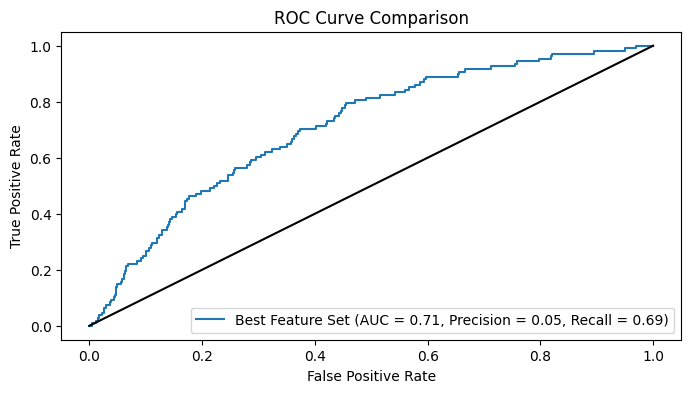

In [107]:
_ = run_logistic_regression(
    credit_risk_transformed_df[best_feature_set],
    credit_risk_transformed_df["default_label"],
    model_name="Best Feature Set"
)

#### 1.2 SVM / Random Forest

#### 1.3 LightGBM

#### 2.1 Data Preprocessing

#### 2.2 Feature Importance Analysis

#### 2.3 Go Deeper towards Feature Importance Analysis! 